In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from skimage import measure
from skimage.color import label2rgb
from pycocotools.coco import COCO

import json
import os

In [2]:
coco = COCO('../combined_dict_unique.json')

loading annotations into memory...
Done (t=0.69s)
creating index...
index created!


{'file_name': 'D2S_003102.jpg', 'height': 1440, 'id': 3102, 'license': 1, 'width': 1920}


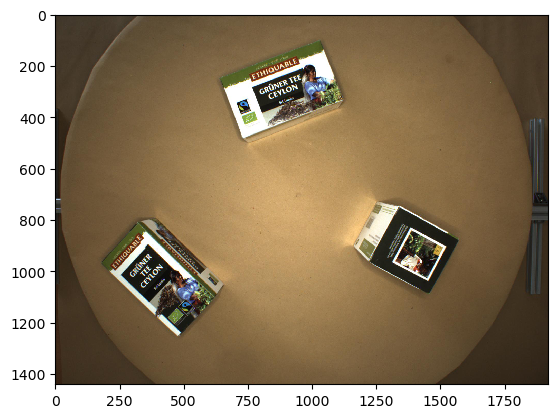

In [3]:
image_dir = '../data/d2s_images_v1/images'
img = coco.imgs[3102]
print(img)
image = np.array(Image.open(os.path.join(image_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

In [15]:
def plot_bbox(anns):
    fig, ax = plt.subplots()
 
    # Draw boxes and add label to each box
    for ann in anns:
        box = ann['bbox']
        bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="red", facecolor="none")
        ax.add_patch(bb)

    ax.imshow(image)
    plt.show()

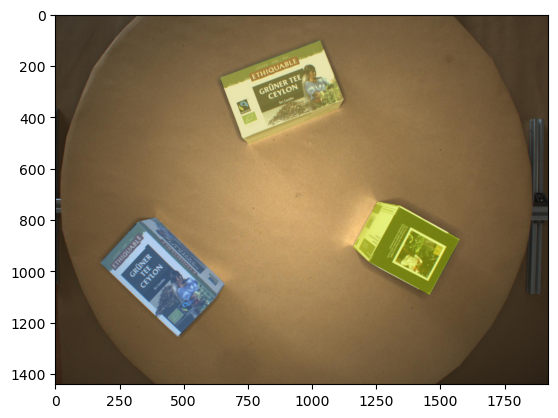

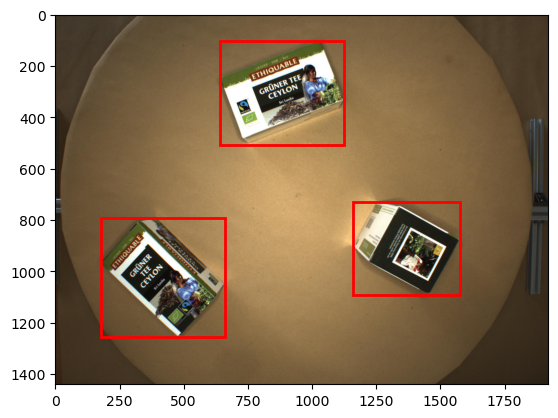

In [17]:
plt.imshow(image)
anns_ids = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)
plot_bbox(anns)


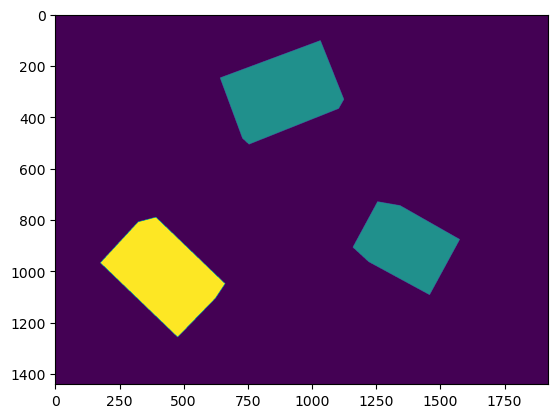

In [6]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)